In [ ]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils.utils_figures import algo_display_short_name_dict, tendency_to_col_dict
from config.local_config import results_dir_univariate

In [38]:
#metric, metricnameinunivariate = 'f1_score', 'f1_avg'
#metric, metricnameinunivariate = 'accuracy', 'accuracy_avg'
metric, metricnameinunivariate = 'balancedaccuracy', 'balancedaccuracy_avg'
#metric, metricnameinunivariate = 'mcc', 'mccscore_avg'

big_perf_df = pd.read_csv(f'big_perf_df_{metric}.csv', index_col=0)

# import meta df
meta_df = pd.read_csv(f'meta_df_{metric}.csv', index_col=0)
meta_df = meta_df[meta_df['tendency'] != '?']
for col in meta_df.columns:
    if 'score' in col:
        meta_df[col] = meta_df[col].astype(float)
    elif 'diff' in col:
        meta_df[col] = meta_df[col].astype(float)

In [39]:
loc_algo_to_col_dict = {
    'ElasticNet':       '#6996ff',
    'PLSDA':            '#6996ff',
    'SVMlinear':        '#6996ff',
    'SVMrbf':           '#6996ff',
    'AdaBoost':         '#1ee1ff',
    'SCMBoost':         '#1ee1ff',
    'GBtree':           '#1ee1ff',
    'XGBoost':          '#1ee1ff',
    'DT':               '#1ee1ff',
    'RF':               '#1ee1ff',
    'SCM':              '#1ee1ff',
    'rSCM':             '#1ee1ff',
}

dataset: MTBLS2289-MTBLS2289GCMSmetaboliteprofiling-BRL3GFP-Col0WT
class 0 : BRL3GFP
class 1 : Col0WT
dataset: MTBLS4206-MTBLS4206LCMSpositivereversephasemetaboliteprofiling-PsoriaticArthritis-RheumatoidArthritis


/tmp/ipykernel_28201/1613393420.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i][0].set_xticklabels(algos_display_names, fontsize=13)
/tmp/ipykernel_28201/1613393420.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i][0].set_xticklabels(algos_display_names, fontsize=13)


class 0 : PsoriaticArthritis
class 1 : RheumatoidArthritis
dataset: MTBLS5297-MTBLS5297LCMSnegativehilicmetaboliteprofiling-RAS1-RAS3
class 0 : RAS1
class 1 : RAS3


/tmp/ipykernel_28201/1613393420.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i][0].set_xticklabels(algos_display_names, fontsize=13)


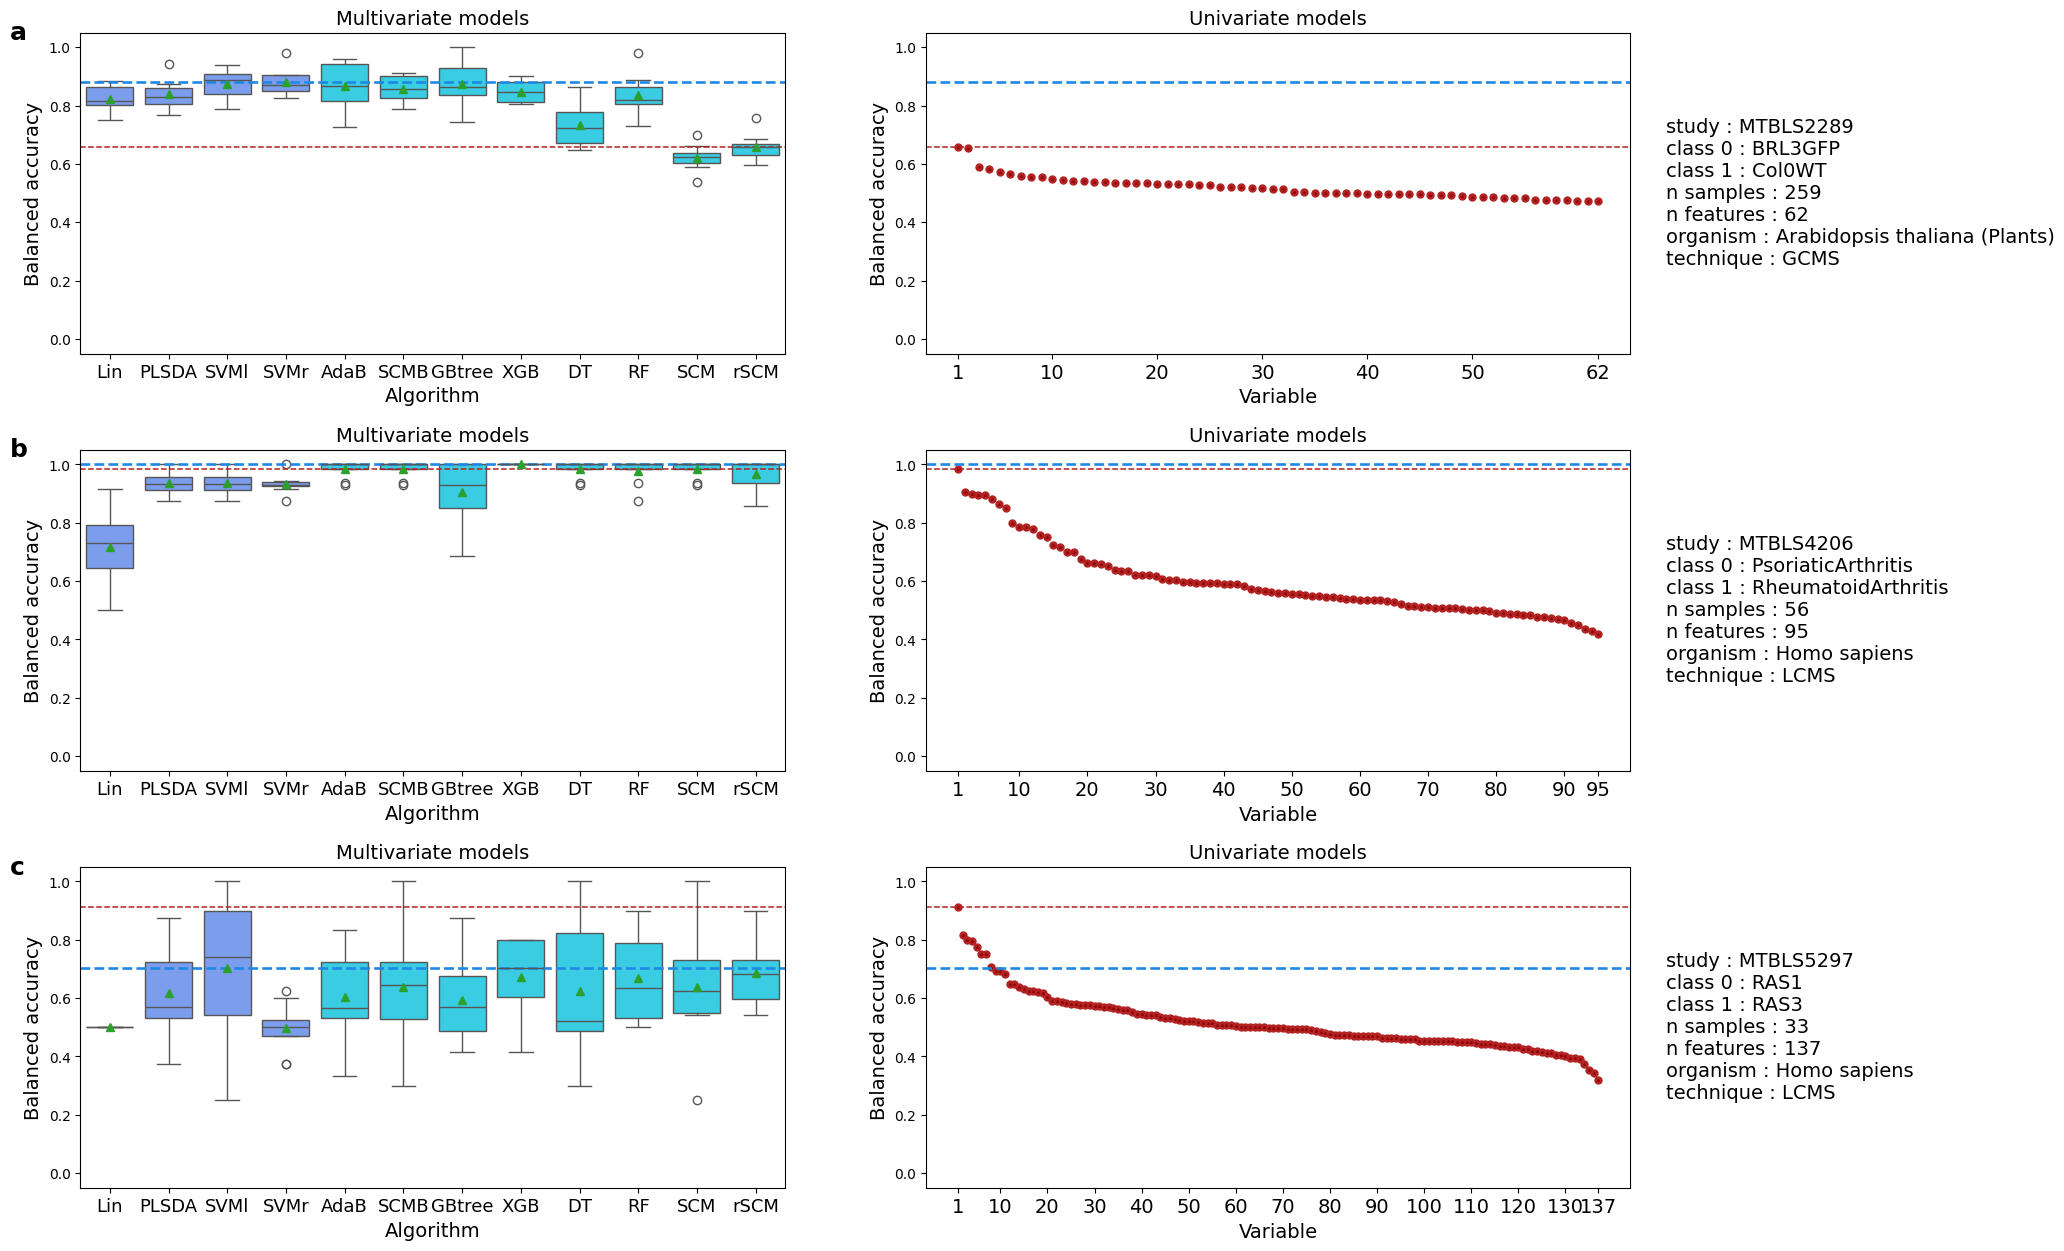

In [40]:
algos_order_lin = ['dummy', 'NaiveBayes', 'ElasticNet', 'PLSDA', 'SVMlinear', 'SVMrbf']
algos_order_rul = ['AdaBoost', 'SCMBoost', 'GBtree', 'XGBoost', 'DT', 'RF', 'SCM', 'rSCM']
algos_order = algos_order_lin + algos_order_rul
algos_order = [algo for algo in algos_order if algo in big_perf_df['algo'].unique()]
big_perf_df = big_perf_df.sort_values(by='algo', key=lambda x: x.map(algos_order.index))

datasets_to_run = []
datasets_to_run.append('MTBLS2289-MTBLS2289GCMSmetaboliteprofiling-BRL3GFP-Col0WT')
datasets_to_run.append('MTBLS4206-MTBLS4206LCMSpositivereversephasemetaboliteprofiling-PsoriaticArthritis-RheumatoidArthritis')
datasets_to_run.append('MTBLS5297-MTBLS5297LCMSnegativehilicmetaboliteprofiling-RAS1-RAS3')

fig, ax = plt.subplots(len(datasets_to_run), 2, figsize=(20, 5*len(datasets_to_run)))
i=0

for dataset in datasets_to_run:
    print(f"dataset: {dataset}")
    loc_big_df = big_perf_df[big_perf_df['dataset'] == dataset].copy()
    loc_big_df = loc_big_df[loc_big_df['type'] == 'test']
    loc_meta_df = meta_df.loc[dataset]
    best_family = loc_meta_df['structure of best method']
    best_algo = loc_meta_df['best algo name']
    diff_rul_lin = loc_meta_df['difference rule-based - linear-based']
    sns.boxplot(data=loc_big_df, x='algo', y='score', ax=ax[i][0], showmeans=True, hue='algo', palette=loc_algo_to_col_dict)
    x_ticks_labels = ax[i][0].get_xticklabels()
    x_ticks_labels = [x.get_text() for x in x_ticks_labels]
    algos_display_names = [algo_display_short_name_dict[a] for a in x_ticks_labels]
    ax[i][0].set_xticklabels(algos_display_names, fontsize=13)
    ax[i][0].axhline(loc_meta_df['best algo score'], ls='--', linewidth=1.9, color=tendency_to_col_dict['multivariate models performs better than univariate models'], label='best algo')
    ax[i][1].axhline(loc_meta_df['best algo score'], ls='--', linewidth=1.9, color=tendency_to_col_dict['multivariate models performs better than univariate models'], label='best algo')
    title_0 = 'Multivariate models'
    title_1 = 'Univariate models'
    ax[i][0].set_title(title_0, fontsize=14)
    ax[i][1].set_title(title_1, fontsize=14)
    #
    univariate_file = 'univariate_df_{}.csv'.format(dataset)
    uni_cols = ['feature', metricnameinunivariate]
    uni_df = pd.read_csv(os.path.join(results_dir_univariate, univariate_file), header=0, usecols=uni_cols)
    uni_df[metricnameinunivariate] = uni_df[metricnameinunivariate].apply(lambda x: float(x))
    uni_df = uni_df.sort_values(by=metricnameinunivariate, ascending=False)
    # plot the univariate
    ax[i][1].axhline(max(uni_df[metricnameinunivariate]), ls='--', linewidth=1.1, color='firebrick', label='best feature')
    ax[i][0].axhline(max(uni_df[metricnameinunivariate]), ls='--', linewidth=1.1, color='firebrick', label='best feature')
    dot_size = 25
    uni_df['feature'] = [x+1 for x in range(len(uni_df))]
    ax[i][1].scatter(uni_df['feature'], uni_df[metricnameinunivariate], color='firebrick', s=dot_size)
    ax[i][1].scatter(uni_df['feature'], uni_df[metricnameinunivariate], color='darkred', s=1, marker='^')
    # 
    ax[i][0].set_ybound(-0.05, 1.05)
    ax[i][1].set_ybound(-0.05, 1.05)
    # remove x ticks labels
    xticks = [int(t) for t in np.arange(0, len(uni_df), 10**int(np.log10(0.7*len(uni_df))))]
    xticks[0] = 1
    if xticks[-1] > len(uni_df)*0.95:
        xticks[-1] = len(uni_df)
    if len(uni_df) not in xticks:
        xticks.append(len(uni_df))
    ax[i][1].set_xticks(xticks)
    ax[i][1].set_xticklabels(xticks, fontsize=14)
    ax[i][1].set_xlabel('Variable', fontsize=14)
    ax[i][0].set_xlabel('Algorithm', fontsize=14)
    metric_display = {'balancedaccuracy': 'Balanced accuracy'}[metric]
    ax[i][0].set_ylabel(metric_display, fontsize=14)
    ax[i][1].set_ylabel(metric_display, fontsize=14)
    # write text on the right side of the plots
    lines_list = []
    lines_list.append(f'study : {dataset.split("-")[0]}')
    lines_list.append(f'class 0 : {dataset.split("-")[2]}')
    print(lines_list[-1])
    lines_list[-1] = lines_list[-1].replace('Light10h', 'Light 10h').replace('LightNatural', 'Natural Light').replace('RPMImodified', 'modified RPMI').replace('pooledsera', 'pooled sera').replace('kimchiwithsaeujeot', 'kimchi with saeu-jeot').replace('otherkimchi', 'other kimchi')
    lines_list.append(f'class 1 : {dataset.split("-")[3]}')
    lines_list[-1] = lines_list[-1].replace('Light10h', 'Light 10h').replace('LightNatural', 'Natural Light').replace('RPMImodified', 'modified RPMI').replace('Pooledsera', 'pooled sera').replace('kimchiwithsaeujeot', 'kimchi with saeu-jeot').replace('otherkimchi', 'other kimchi')
    print(lines_list[-1])
    lines_list.append(f'n samples : {loc_meta_df["n samples"]}')
    lines_list.append(f'n features : {loc_meta_df["n features"]}')
    lines_list.append(f'organism : {loc_meta_df["organism"]} ({loc_meta_df["organism curated"]})')
    if loc_meta_df["organism curated"] == loc_meta_df["organism"]:
        lines_list.pop()
        lines_list.append(f'organism : {loc_meta_df["organism"]}')
    lines_list.append(f'technique : {loc_meta_df["technique category"]}')
    side_title= '\n'.join(lines_list)
    ax[i][0].text(-0.1, 1.0, 'abcdefghijklmno'[i], size=18, weight='bold', ha='left', va='center', transform=ax[i][0].transAxes)
    ax[i][1].text(2.25, 0.5, side_title, fontsize=14, ha='left', va='center', transform=ax[i][0].transAxes)
    i += 1



# add vertical space between the plots
plt.subplots_adjust(hspace=0.3)
plt.savefig('figures/figure4a_selected_datasets_multi_vs_single_representation.pdf', bbox_inches='tight')
plt.show()



In [41]:
meta_df.columns

Index(['id', 'file', 'n samples', 'n features', 'metadata column', '1 label',
       '0 label', 'Study Assay Technology Platform', 'affiliation',
       'release date', 'organism', 'baseline majoritary score',
       'best univariate score', 'best method score', 'best algo name',
       'best algo score', 'tendency', 'number of algos runned', 'n zeros in y',
       'n ones in y', 'best linear-based algo name',
       'best linear-based algo score', 'best rule-based algo name',
       'best rule-based algo score', 'technique category', 'organism curated',
       'organism category', 'phenotype description combined', 'embeddings_PC0',
       'embeddings_PC1', 'phenotype keyword', 'difference ML univariate',
       'absolute difference |ML - univariate|', 'best overall score',
       'fatness', 'is fat', 'release year',
       'difference rule-based - linear-based', 'structure of best method'],
      dtype='object')

/tmp/ipykernel_28201/1986394696.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend().remove()


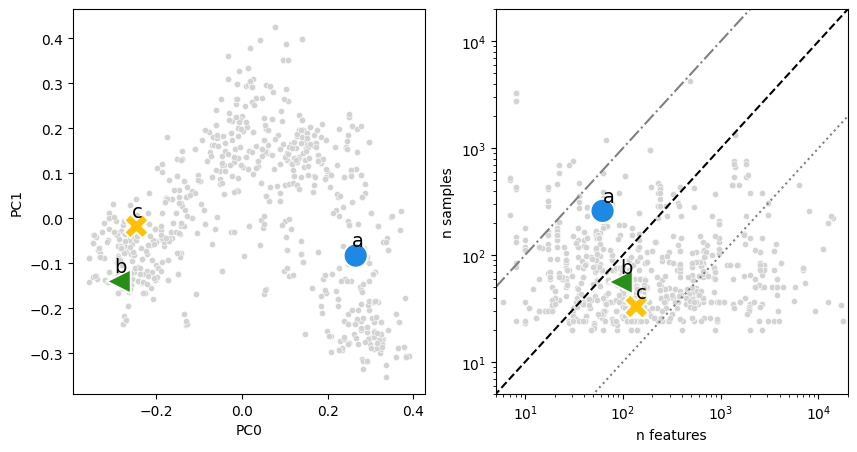

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

hue_order = ['multivariate models performs better than univariate models',
             'multivariate and univariate models are equivalent',
             'univariate models performs better than multivariate models',
             'no models performs better than the baseline']

tendency_to_marker = {'multivariate models performs better than univariate models': 'o',
                      'multivariate and univariate models are equivalent': '<',
                      'univariate models performs better than multivariate models': 'X',
                      'no models performs better than the baseline': 'p'}

meta_df = meta_df.rename(columns={'embeddings_PC0': 'PC0', 'embeddings_PC1': 'PC1'})
sns.scatterplot(data=meta_df, x='PC0', y='PC1', color='lightgray', ax=axs[0], s=20)
sns.scatterplot(data=meta_df, x='n features', y='n samples', color='lightgray', ax=axs[1], s=20)
#
selected_datasets_df = meta_df.loc[datasets_to_run]
sns.scatterplot(data=selected_datasets_df, x='PC0', y='PC1', hue='tendency', hue_order=hue_order, palette=tendency_to_col_dict, s=300, style='tendency', markers=tendency_to_marker, ax=axs[0], legend=False)
sns.scatterplot(data=selected_datasets_df, x='n features', y='n samples', hue='tendency', hue_order=hue_order, palette=tendency_to_col_dict, s=300, style='tendency', markers=tendency_to_marker, ax=axs[1], legend=False)
#
id = 0
for i, row in selected_datasets_df.iterrows():
    axs[0].text(row['PC0']-0.01, row['PC1']+0.02, 'abcdefghijklmno'[id], fontsize=14)
    axs[1].text(row['n features'] , row['n samples']*1.2 , 'abcdefghijklmno'[id], fontsize=14)
    id += 1
#
axs[0].legend().remove()
max_dim, min_dim = 20000, 5
axs[1].plot([0, max_dim], [0, max_dim], ls='--', color='black', label='n samples == n features')
axs[1].plot([min_dim, max_dim/10], [min_dim*10, max_dim], ls='dashdot', color='grey', label='10 times more samples than features')
axs[1].plot([min_dim, max_dim*10], [min_dim/10, max_dim], ls='dotted', color='grey', label='10 times more features than samples')
axs[1].set_xlim(min_dim, max_dim)
axs[1].set_ylim(min_dim, max_dim)
axs[1].set_xscale('log')
axs[1].set_yscale('log')


#plt.savefig('figures/supplementary_4b_position_of_the_selected_datasets.pdf', bbox_inches='tight')
